# Imports y cargar el csv

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import seaborn as sns


# DEFINICION DEL ESTILO DE LAS IMAGENES
TITULOS={"weight" : "bold", "size" : 20}
SUBTITULOS={"weight" : "bold", "size" : 16}

bar_colors = ['#D4E0FE', '#F9E892', '#FFA379', '#FF5034']
COLORS = plt.cm.Pastel1.colors
###############################################3

train_csv_path = 'D:/INFO/TFG/Breast Density/Dataset/train_all.csv'

csv_path_test = 'D:/INFO/TFG/Breast Density/Dataset/all_test.csv'
# Ruta base del dataset

train_folder = 'D:/INFO/TFG/Breast Density/Dataset/train/Train/'
test_folder = 'D:/INFO/TFG/Breast Density/Dataset/test/Test/'

file_extension = '.png'

train_df = pd.read_csv(train_csv_path)

csv_test = pd.read_csv(csv_path_test)

suma = train_df.shape[0] + csv_test.shape[0]

both_df = pd.concat([train_df, csv_test], axis=0)

train_df.head()

,Unnamed: 0.1,Unnamed: 0,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,scan_shape,mask_shape,status
0,0,0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,P_00001_LEFT_CC_mass_1.png,P_00001_LEFT_CC_mass_1.png,P_00001_LEFT_CC_mass_1.png,"(3024, 4808, 1)","(3024, 4808, 1)",OK
1,1,1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,P_00001_LEFT_MLO_mass_1.png,P_00001_LEFT_MLO_mass_1.png,P_00001_LEFT_MLO_mass_1.png,"(2656, 4800, 1)","(2656, 4800, 1)",OK
2,2,2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,P_00004_LEFT_CC_mass_1.png,P_00004_LEFT_CC_mass_1.png,P_00004_LEFT_CC_mass_1.png,"(2986, 5491, 1)","(2986, 5491, 1)",OK
3,3,3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,P_00004_LEFT_MLO_mass_1.png,P_00004_LEFT_MLO_mass_1.png,P_00004_LEFT_MLO_mass_1.png,"(3046, 5491, 1)","(3046, 5491, 1)",OK
4,4,4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,P_00004_RIGHT_MLO_mass_1.png,P_00004_RIGHT_MLO_mass_1.png,P_00004_RIGHT_MLO_mass_1.png,"(2911, 5491, 1)","(2911, 5491, 1)",OK


# Imagen de muestra

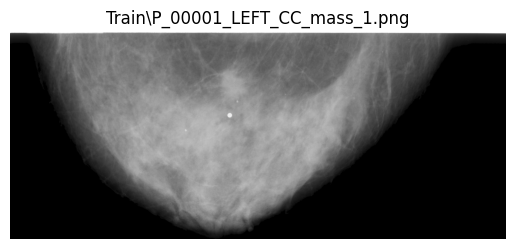

In [20]:
image_path = glob.glob(train_folder + "/*")[0]
plt.imshow(io.imread(image_path), cmap="gray")
plt.title(image_path.split("/")[-1])
plt.axis('off')
plt.show()

# Distribución de características

## Densidad mamaria

C:\Users\cante\AppData\Local\Temp\ipykernel_17676\768139715.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index)


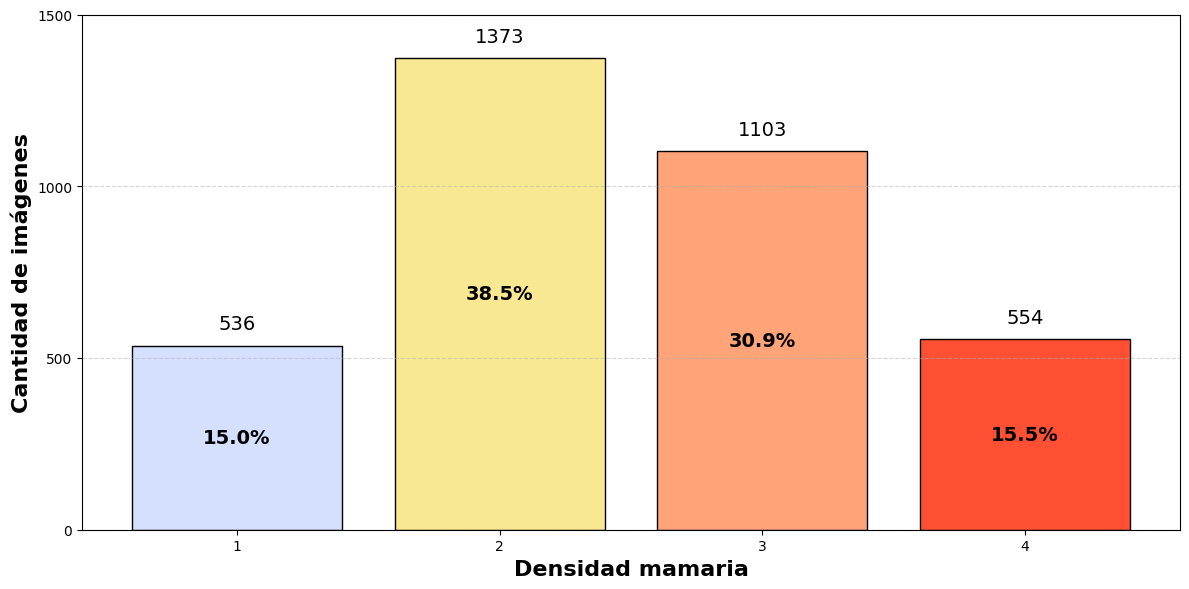

In [6]:
counts = both_df['breast_density'].value_counts().sort_index()

total = counts.sum()
porcentajes = (counts / total) * 100

# Paso 2: Diccionario de colores
color_dict = {
    True: 'gray',
    False: 'cyan'
}

# Paso 3: Gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
machine_ids = counts.index.tolist()
bars = ax.bar([str(i) for i in machine_ids], counts.values, color=bar_colors, edgecolor='black')

# Paso 4: Añadir etiquetas
for bar, count, pct in zip(bars, counts.values, porcentajes.values):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + total * 0.01, f"{count}", ha='center', va='bottom', fontsize=14)           # Cantidad arriba
    ax.text(x, y * 0.5, f"{pct:.1f}%", ha='center', va='center', fontsize=14, color='black', fontweight='bold')  # Porcentaje dentro

# Estética
ax.set_xlabel("Densidad mamaria", fontdict=SUBTITULOS)
ax.set_ylabel("Cantidad de imágenes", fontdict=SUBTITULOS)
ax.set_xticklabels(counts.index)
ax.set_yticks(range(0, 2000, 500))
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Breast_density_counts: breast_density
1     536
2    1373
3    1103
4     554
Name: count, dtype: int64


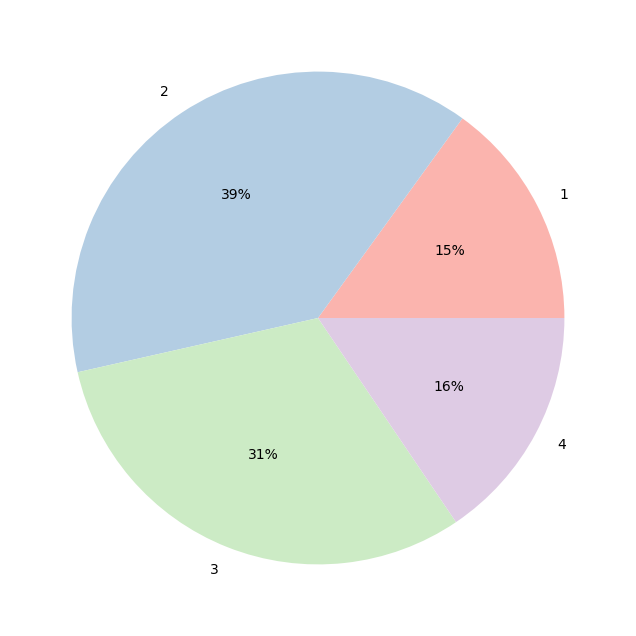

In [8]:
import matplotlib.pyplot as plt

# Analizar la distribución de breast_density
breast_density_counts = both_df["breast_density"].value_counts().sort_index()
total = breast_density_counts.sum()
porcentajes = (breast_density_counts / total) * 100

print(f"Breast_density_counts: {breast_density_counts}")

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(breast_density_counts, 
        labels=breast_density_counts.index.astype(str), 
        autopct='%1.0f%%', 
        colors=COLORS)
#plt.title("Distribución de Breast Density en el Dataset", fontdict=TITULOS)
plt.show()

In [9]:
def get_dicom_info(dicom_path):
    """Obtiene información relevante de un archivo DICOM"""
    ds = pydicom.dcmread(dicom_path)
    file_size = os.path.getsize(dicom_path)  # Peso en bytes
    dimensions = (ds.Rows, ds.Columns)  # Dimensiones de la imagen
    return file_size, dimensions

# Recorrer directorios y obtener información de imágenes
image_data = []
for root, _, files in os.walk(train_folder):
    for file in files:
        if file.endswith(file_extension):
            path = os.path.join(root, file)
            
            # Por cada tipo de archivo obtenemos la informacion de forma diferente
            if file_extension == '.dcm':
                file_size, dimensions = get_dicom_info(path)
            elif file_extension == '.png':
                dimensions = io.imread(path).shape
                file_size = os.path.getsize(path)

            image_data.append({
                "file_path": path,
                "file_size_kb": file_size / 1024,  # Convertir a KB
                "width": dimensions[1],
                "height": dimensions[0]
            })

# Crear DataFrame
data_size = pd.DataFrame(image_data)

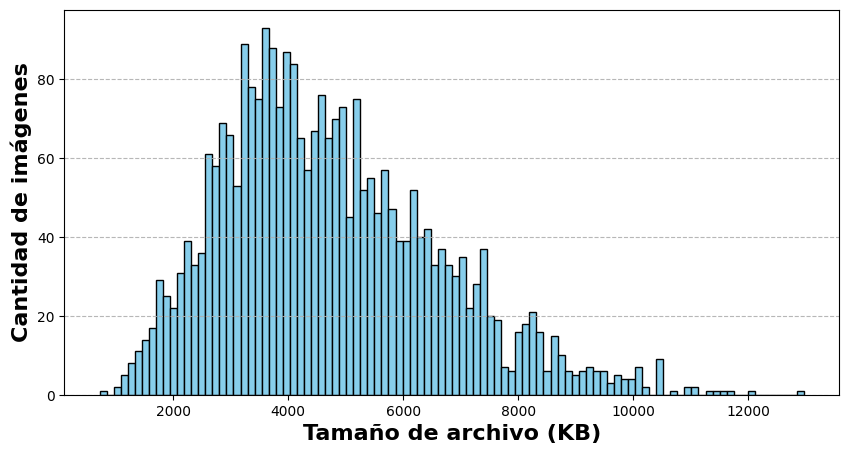

In [10]:
# Plots
plt.figure(figsize=(10, 5))
plt.hist(data_size["file_size_kb"], bins=100, color='skyblue', edgecolor='black')
plt.xlabel("Tamaño de archivo (KB)", fontdict=SUBTITULOS)
plt.ylabel("Cantidad de imágenes", fontdict=SUBTITULOS)
#plt.title("Distribución de la resolución de las imágenes", fontdict=TITULOS)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

# Abnormality type

In [5]:
train_df['abnormality_type'].value_counts()

abnormality_type
calcification    1546
mass             1318
Name: count, dtype: int64

# Tamaño de las imagenes a nivel de **pixel**

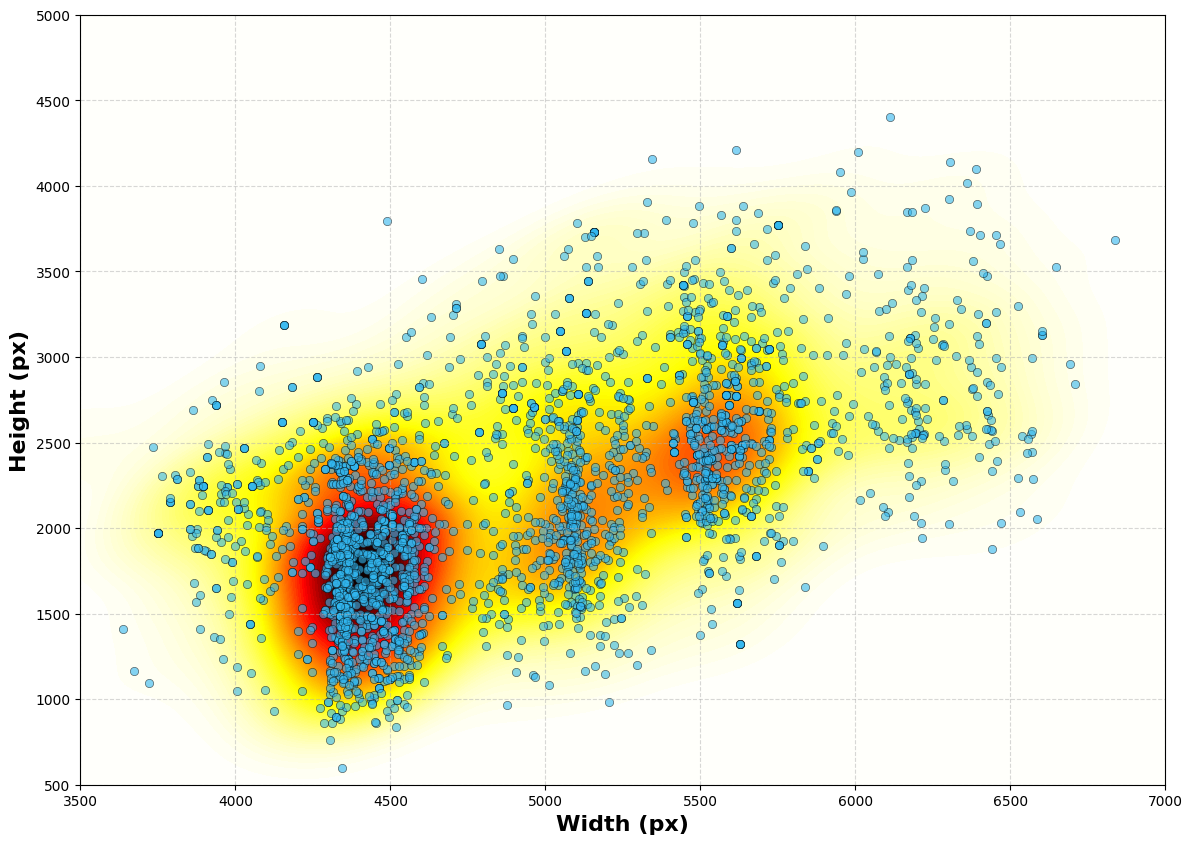

In [ ]:

# Supongamos que `df` es el DataFrame con la información de las imágenes
plt.figure(figsize=(14, 10))

# Dibujar el heatmap de densidad con kdeplot
sns.kdeplot(
    x=data_size["width"], 
    y=data_size["height"], 
    cmap="hot_r", 
    fill=True, 
    thresh=0, 
    levels=100
)

# Agregar el scatter plot encima del heatmap
sns.scatterplot(
    x=data_size["width"], 
    y=data_size["height"],
    c = "#32b7f0",
    edgecolor="black", 
    alpha=0.6
)

plt.xlim(3500, 7000)
plt.ylim(500, 5000)
plt.xlabel("Width (px)", fontdict=SUBTITULOS)
plt.ylabel("Height (px)", fontdict=SUBTITULOS)
#plt.title("Distribución de dimensiones de las imágenes", fontdict=TITULOS)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Cantidad de imagenes por pecho y por image view

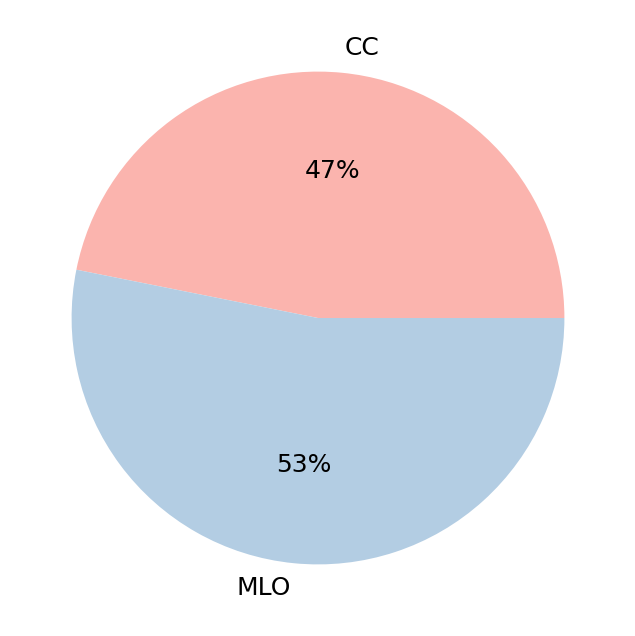

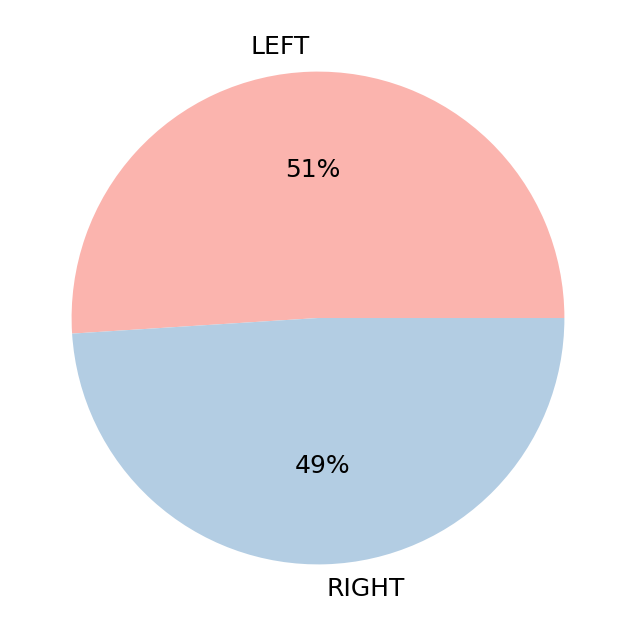

In [11]:
plt.figure(figsize=(16, 8))
plt.pie(both_df["image_view"].value_counts().sort_index(), labels=["CC", "MLO"], autopct='%1.0f%%', textprops={"size" : 18}, colors=COLORS)
#plt.title("Tipo de proyección", fontdict=TITULOS)
plt.show()

plt.figure(figsize=(16, 8))
plt.pie(both_df["left_or_right_breast"].value_counts().sort_index(), labels=["LEFT", "RIGHT"], autopct='%1.0f%%', textprops={"size" : 18}, colors=COLORS)
#plt.title("Distribución pecho derecho o izquierdo", fontdict=TITULOS)
plt.show()

## Orientación del pecho

In [15]:
import glob

def binarize(img: np.ndarray, threshold: float = 0.2) -> np.ndarray:
    """
    Binariza la imagen: los píxeles con valor > threshold se ponen a 1 (blanco),
    el resto a 0 (negro).
    """
    if img.max() > 1.0:
        img = img / 255.0  # normaliza si está en escala 0-255
    return (img > threshold).astype(np.uint8)

def get_dire(img: np.ndarray, rect_ratio: float = 0.2) -> np.ndarray:
    """
    Asegura que el pecho siempre provenga de ARRIBA usando una imagen binarizada.
    Evalúa si hay más 'masa blanca' en los bordes y rota/flipa en consecuencia.
    """
    bin_img = binarize(img)
    y, x = bin_img.shape

    # Tamaño del rectángulo de inspección (20% por defecto)
    rx, ry = int(x * rect_ratio), int(y * rect_ratio)

    # Define rectángulos de interés (bordes)
    top = bin_img[:ry, :]
    bottom = bin_img[-ry:, :]

    # Conteo de píxeles blancos en cada región
    sumT, sumB = np.sum(top), np.sum(bottom)

    max_value = max(sumT, sumB)

    if max_value == sumT:
        return 'Top'

    return 'Bottom'


d = {"Top": 0, "Bottom" : 0}
for file in glob.glob(train_folder + "/*"):
    d[get_dire(io.imread(file))] += 1

d

{'Top': 1355, 'Bottom': 1444}

([<matplotlib.patches.Wedge at 0x25231d9dc40>,
 [Text(0.05491844375655357, 1.0986282194333796, 'Arriba'),
  Text(-0.05491808577803848, -1.0986282373280218, 'Abajo')],
 [Text(0.029955514776301942, 0.5992517560545707, '48%'),
  Text(-0.02995531951529371, -0.5992517658152845, '52%')])

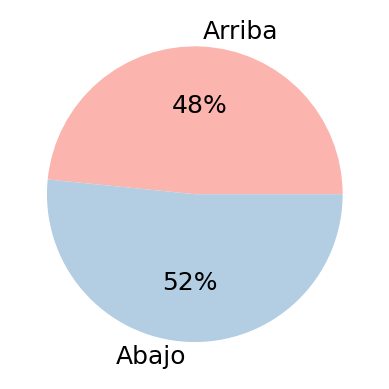

In [16]:
plt.pie([d["Top"], d['Bottom']], labels=["Arriba", "Abajo"], autopct='%1.0f%%', textprops={"size" : 18}, colors=COLORS)